###let's start with two classes



In [1]:
!git clone https://github.com/Hajji-Manal/DeepLearningProject.git
path = "./DeepLearningProject/Classes/"

Cloning into 'DeepLearningProject'...
remote: Enumerating objects: 3284, done.
remote: Counting objects: 100% (3284/3284), done.
remote: Compressing objects: 100% (3282/3282), done.
remote: Total 3284 (delta 1), reused 3284 (delta 1), pack-reused 0
Receiving objects: 100% (3284/3284), 58.68 MiB | 34.79 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, BatchNormalization, Activation
from keras.models import Model, Sequential
from keras.optimizers import Adam

In [3]:
classes = os.listdir(path)

def load_data(data_path, image_size=150):

    classes = os.listdir(data_path)

    # On calcule le nombre d'images au total
    num_images = 0
    for i in range(len(classes)):
        images = sorted(os.listdir(data_path + '/' + classes[i]))
        num_images += len(images)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, len(classes)))

    current_index = 0
    # Parcours des différents répertoires pour collecter les images
    for i in range(len(classes)):
        images = sorted(os.listdir(data_path + '/' + classes[i]))

        # Chargement des images, 
        for image_index in range(len(images)):
            image = images[image_index]
            if os.path.isfile(data_path  + '/' + classes[i] + '/' + image):
                # Ouverture de l'image
                img = Image.open(data_path  + '/' + classes[i] + '/' + image).convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img) / 255
                # Écriture du label associé dans la variable de retour y
                y[current_index][i] = 1 
                current_index += 1

    return x, y

In [4]:
print(classes)

['Ford', 'Renault']


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X, Y = load_data(path, image_size=150) ## Chargement des données
X.shape, Y.shape

X_train, X_int, Y_train, Y_int = train_test_split(X, Y, train_size=0.8) ## 80% de train
X_test,X_val, Y_test,Y_val = train_test_split(X_int, Y_int, train_size=0.5) ## 10% de test et 10% de validation
Y_train.shape

(584, 2)

In [ ]:
model = models.Sequential()
# A COMPLETER
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
x=model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  

model.add(Dense(512, activation='relu'))   # Couche dense, à 512 neurones
model.add(Dense(2, activation='sigmoid'))   # Couche de sortie

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 18, 18, 128)     

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=3e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size= 10)

Epoch 1/20
59/59 [==============================] - 1s 17ms/step - loss: 0.6406 - acc: 0.6629 - val_loss: 0.4666 - val_acc: 0.7397
Epoch 2/20
59/59 [==============================] - 1s 12ms/step - loss: 0.5654 - acc: 0.7358 - val_loss: 0.4332 - val_acc: 0.7945
Epoch 3/20
59/59 [==============================] - 1s 12ms/step - loss: 0.4434 - acc: 0.8358 - val_loss: 0.3770 - val_acc: 0.8767
Epoch 4/20
59/59 [==============================] - 1s 12ms/step - loss: 0.3329 - acc: 0.8769 - val_loss: 0.3395 - val_acc: 0.8767
Epoch 5/20
59/59 [==============================] - 1s 12ms/step - loss: 0.2962 - acc: 0.8935 - val_loss: 0.3116 - val_acc: 0.8767
Epoch 6/20
59/59 [==============================] - 1s 12ms/step - loss: 0.2746 - acc: 0.8941 - val_loss: 0.4603 - val_acc: 0.7808
Epoch 7/20
59/59 [==============================] - 1s 12ms/step - loss: 0.2049 - acc: 0.9244 - val_loss: 0.2199 - val_acc: 0.9178
Epoch 8/20
59/59 [==============================] - 1s 12ms/step - loss: 0.1935 - a

In [20]:
def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

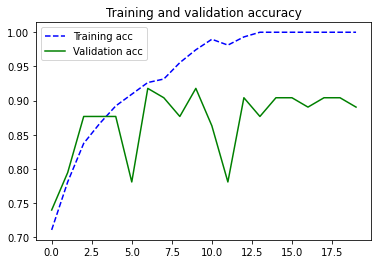

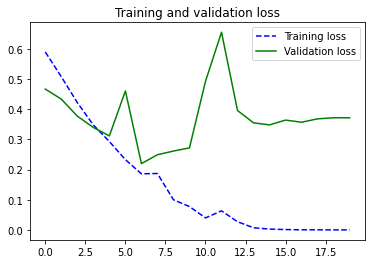

In [ ]:
plot_training_analysis()

In [ ]:
model = models.Sequential()
# A COMPLETER
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu',padding='same'))
model.add(Conv2D(32, (3, 3),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Dropout(0.5))
x=model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  

model.add(Dense(512, activation='relu'))   # Couche dense, à 512 neurones
model.add(Dense(2, activation='sigmoid'))   # Couche de sortie

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 18, 18, 96)      

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=3e-4),
              metrics=['acc'])

In [ ]:
from keras.callbacks import ModelCheckpoint


mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size= 10, callbacks=[mc])

Epoch 1/20
59/59 [==============================] - 2s 21ms/step - loss: 0.6825 - acc: 0.5627 - val_loss: 0.4992 - val_acc: 0.7671

Epoch 00001: val_loss improved from inf to 0.49919, saving model to best_model.h5
Epoch 2/20
59/59 [==============================] - 1s 17ms/step - loss: 0.5554 - acc: 0.7464 - val_loss: 0.6047 - val_acc: 0.6164

Epoch 00002: val_loss did not improve from 0.49919
Epoch 3/20
59/59 [==============================] - 1s 17ms/step - loss: 0.4696 - acc: 0.7949 - val_loss: 0.4572 - val_acc: 0.8767

Epoch 00003: val_loss improved from 0.49919 to 0.45722, saving model to best_model.h5
Epoch 4/20
59/59 [==============================] - 1s 17ms/step - loss: 0.3782 - acc: 0.8386 - val_loss: 0.4672 - val_acc: 0.7671

Epoch 00004: val_loss did not improve from 0.45722
Epoch 5/20
59/59 [==============================] - 1s 17ms/step - loss: 0.3166 - acc: 0.8656 - val_loss: 0.3458 - val_acc: 0.9041

Epoch 00005: val_loss improved from 0.45722 to 0.34583, saving model t

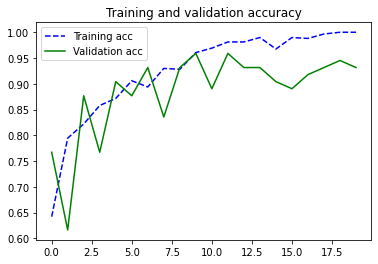

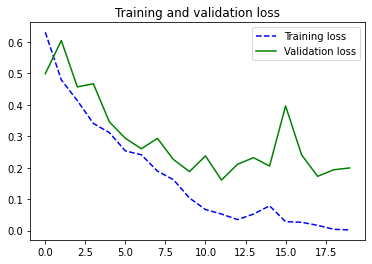

In [ ]:
plot_training_analysis()

###Prédiction avec model

In [ ]:

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=32)
print("[test loss, test acc] : ", results)

Evaluate on test data
3/3 [==============================] - 0s 15ms/step - loss: 0.3406 - acc: 0.9589
[test loss, test acc] :  [0.34061411023139954, 0.9589040875434875]


In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
samples = X_test[:3]
labels = Y_test[:3]
predictions = model.predict(samples)
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 2)


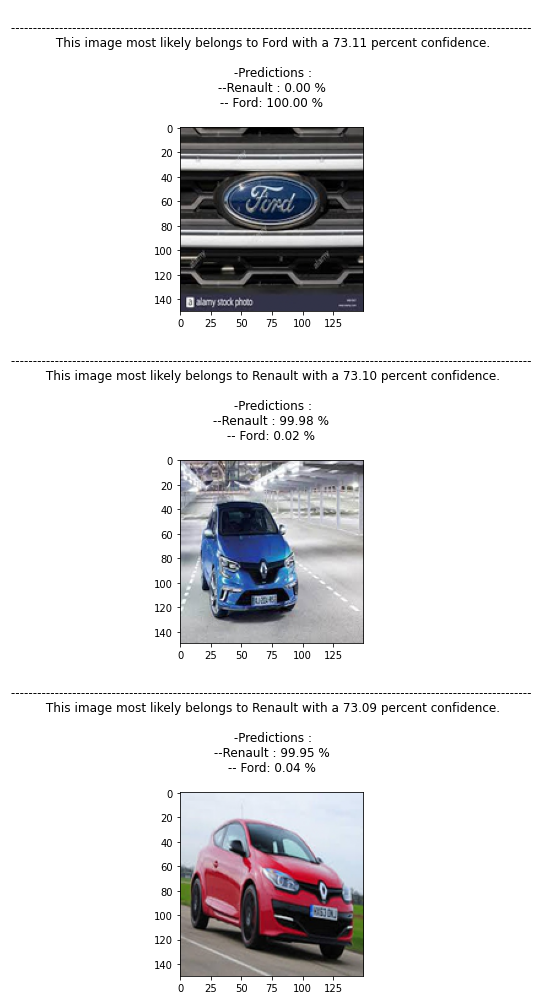

In [ ]:
class_id = [0,1] 
plt.figure(figsize=(14, 14))
for i in range(0, len(samples)):
  score = tf.nn.softmax(predictions[i])
  for j in range(0,1):
    plt.subplot(3, 1, i+1)
    plt.title("\n ----------------------------------------------------------------------------------------------------------------------- \n This image most likely belongs to {} with a {:.2f} percent confidence.\n \n -Predictions :\n --{} : {:.2f} % \n -- {}: {:.2f} % \n"
    .format(classes[np.argmax(score)], 100 * np.max(score),classes[0],predictions[i][0]*100,classes[1],predictions[i][1]*100))
    plt.imshow(samples[i])
    break
         
plt.tight_layout()
plt.show()

###Prediction avec best model

In [ ]:
from keras.models import load_model

best_model = load_model("best_model.h5")
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = best_model.evaluate(X_test, Y_test, batch_size=32)
print("[test loss, test acc] : ", results)

Evaluate on test data
3/3 [==============================] - 0s 15ms/step - loss: 0.3029 - acc: 0.9041
[test loss, test acc] :  [0.30291542410850525, 0.9041095972061157]


In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
samples = X_test[:3]
labels = Y_test[:3]
predictions = best_model.predict(samples)
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 2)


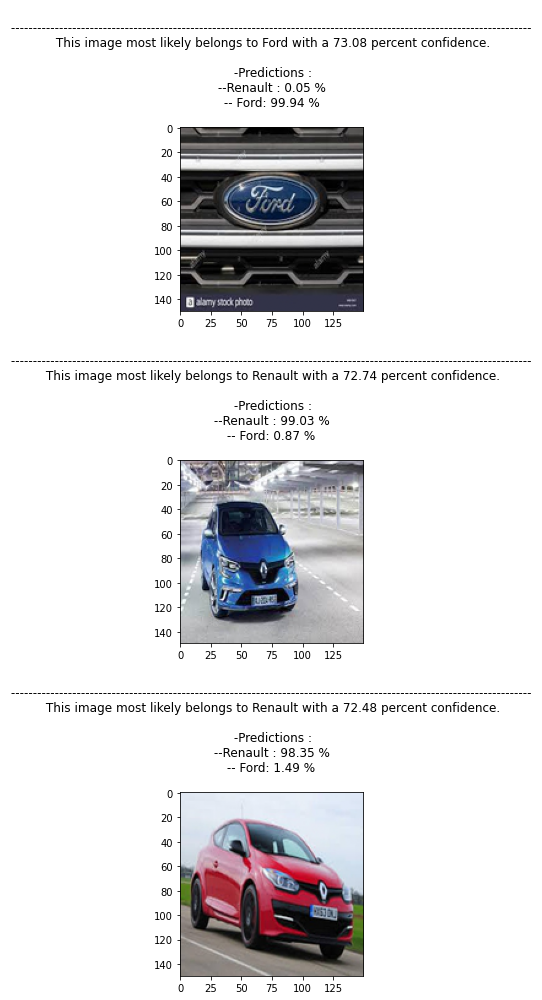

In [ ]:
class_id = [0,1] 
plt.figure(figsize=(14, 14))
for i in range(0, len(samples)):
  score = tf.nn.softmax(predictions[i])
  for j in range(0,1):
    plt.subplot(3, 1, i+1)
    plt.title("\n ----------------------------------------------------------------------------------------------------------------------- \n This image most likely belongs to {} with a {:.2f} percent confidence.\n \n -Predictions :\n --{} : {:.2f} % \n -- {}: {:.2f} % \n"
    .format(classes[np.argmax(score)], 100 * np.max(score),classes[0],predictions[i][0]*100,classes[1],predictions[i][1]*100))
    plt.imshow(samples[i])
    break
         
plt.tight_layout()
plt.show()

###Matrice de confusion

In [ ]:
argpred=np.argmax(predictions,axis=1)
label_arg = np.argmax(labels,axis=1)
print(label_arg)
print(argpred)

[1 0 0]
[1 0 0]


In [ ]:
con_mat = tf.math.confusion_matrix(label_arg,argpred).numpy()
print(con_mat)

[[2 0]
 [0 1]]


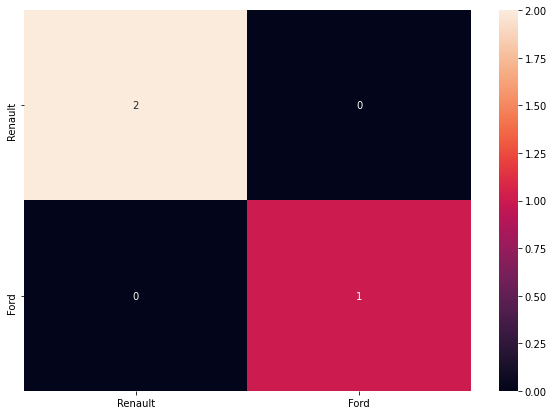

In [ ]:
import seaborn as sns
import pandas as pd

df_cm = pd.DataFrame(con_mat, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

### Let's work with all classes now

In [11]:
newpath = "./DeepLearningProject/AllClasses/"

In [12]:
newClasses = os.listdir(newpath)
print(newClasses)

['Fiat', 'Ferrari', 'Jaguar', 'KIA', 'Ford', 'Mercedes', 'Opel', 'BMW', 'Volkswagen', 'Renault']


In [13]:
x, y = load_data(newpath, image_size=150) ## Chargement des données
x.shape, y.shape

x_train, x_int, y_train, y_int = train_test_split(x, y, train_size=0.8) ## 80% de train
x_test,x_val, y_test,y_val = train_test_split(x_int, y_int, train_size=0.5) ## 10% de test et 10% de validation
y_train.shape

(2662, 10)

In [ ]:
model = models.Sequential()
# A COMPLETER
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu',padding='same'))
model.add(Conv2D(32, (3, 3),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Dropout(0.5))
x=model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  

model.add(Dense(512, activation='relu'))   # Couche dense, à 512 neurones
model.add(Dense(10, activation='softmax'))   # Couche de sortie

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 18, 18, 96)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=3e-4),
              metrics=['acc'])

In [ ]:
from keras.callbacks import ModelCheckpoint


mcc = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size= 32, callbacks=[mcc])

Epoch 1/30
84/84 [==============================] - 5s 53ms/step - loss: 2.2315 - acc: 0.1768 - val_loss: 2.0255 - val_acc: 0.3003

Epoch 00001: val_loss improved from inf to 2.02548, saving model to best_model2.h5
Epoch 2/30
84/84 [==============================] - 4s 50ms/step - loss: 1.8762 - acc: 0.3445 - val_loss: 1.8206 - val_acc: 0.3904

Epoch 00002: val_loss improved from 2.02548 to 1.82056, saving model to best_model2.h5
Epoch 3/30
84/84 [==============================] - 4s 51ms/step - loss: 1.5657 - acc: 0.4615 - val_loss: 1.5961 - val_acc: 0.4955

Epoch 00003: val_loss improved from 1.82056 to 1.59607, saving model to best_model2.h5
Epoch 4/30
84/84 [==============================] - 4s 51ms/step - loss: 1.2677 - acc: 0.5841 - val_loss: 1.5328 - val_acc: 0.4895

Epoch 00004: val_loss improved from 1.59607 to 1.53277, saving model to best_model2.h5
Epoch 5/30
84/84 [==============================] - 4s 51ms/step - loss: 1.0259 - acc: 0.6537 - val_loss: 1.4465 - val_acc: 0.54

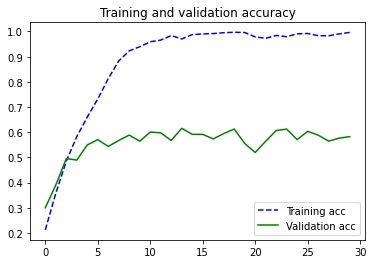

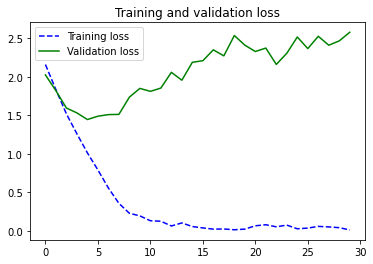

In [ ]:
plot_training_analysis()

In [ ]:

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=32)
print("[test loss, test acc] : ", results)

print("----------------------------------------------------")

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
predictions = model.predict(x_test[:10])
print("predictions shape:", predictions.shape)

Evaluate on test data
11/11 [==============================] - 0s 21ms/step - loss: 2.4724 - acc: 0.6006
[test loss, test acc] :  [2.4723894596099854, 0.6006006002426147]
----------------------------------------------------
Generate predictions for 10 samples
predictions shape: (10, 10)


In [ ]:
from keras.models import load_model

best_model = load_model("best_model2.h5")
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = best_model.evaluate(x_test, y_test, batch_size=32)
print("[test loss, test acc] : ", results)

print("----------------------------------------------------")

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
samples = x_test[:10]
labels = y_test[:10]
predictions = best_model.predict(samples)
print("predictions shape:", predictions.shape)

Evaluate on test data
11/11 [==============================] - 0s 20ms/step - loss: 1.4066 - acc: 0.5676
[test loss, test acc] :  [1.4066243171691895, 0.5675675868988037]
----------------------------------------------------
Generate predictions for 10 samples
predictions shape: (10, 10)


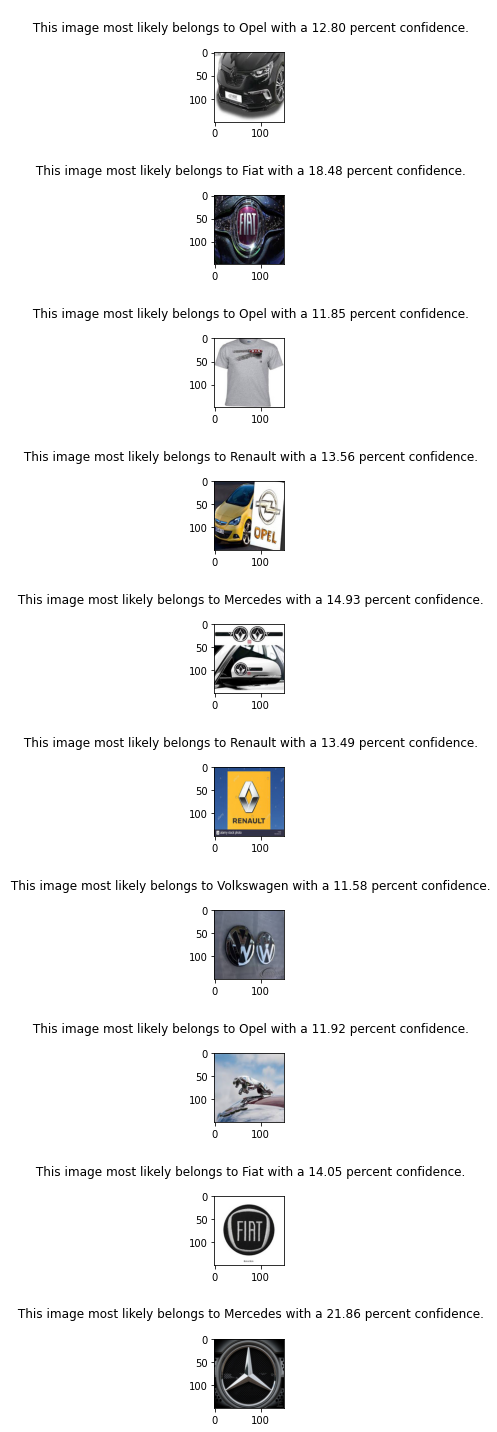

In [ ]:
class_id = [0,1] 
plt.figure(figsize=(20, 20))
for i in range(0, len(samples)):
  score = tf.nn.softmax(predictions[i])
  for j in range(0,1):
    plt.subplot(len(samples), 1, i+1)
    plt.title("\n This image most likely belongs to {} with a {:.2f} percent confidence.\n "
    .format(newClasses[np.argmax(score)], 100 * np.max(score)))
    plt.imshow(samples[i])
    break
         
plt.tight_layout()
plt.show()

In [ ]:
print(newClasses)

['Volkswagen', 'Jaguar', 'BMW', 'Mercedes', 'Renault', 'Ferrari', 'Ford', 'KIA', 'Opel', 'Fiat']


In [ ]:
print(predictions)

[[0.19998081 0.01962141 0.01768665 0.06157925 0.2342203  0.01496954
  0.02625336 0.05381276 0.35385516 0.01802078]
 [0.05152516 0.0218002  0.00564935 0.11012347 0.01296293 0.0093047
  0.00127003 0.04275576 0.00223963 0.74236876]
 [0.08343127 0.12854442 0.02907672 0.10500934 0.09519269 0.03613328
  0.04181809 0.11150349 0.27177328 0.0975174 ]
 [0.05504388 0.03307641 0.00288418 0.07273126 0.41197023 0.20697649
  0.01733541 0.09244658 0.09049302 0.0170426 ]
 [0.00938273 0.07536741 0.04080238 0.5121405  0.06864225 0.04062856
  0.01911367 0.12822664 0.06590658 0.0397893 ]
 [0.03263769 0.0031795  0.00096563 0.04130983 0.41183367 0.38464388
  0.00254796 0.01272602 0.10740076 0.00275507]
 [0.24893211 0.10302555 0.08943175 0.17623504 0.1245771  0.02747506
  0.01769048 0.06947748 0.04554443 0.09761112]
 [0.1486324  0.06146841 0.01273931 0.2340862  0.05522238 0.02897378
  0.04080626 0.07779479 0.2791298  0.06114667]
 [0.42091614 0.00461613 0.00459803 0.00655181 0.0036292  0.00300055
  0.00102235 

In [ ]:
argpred=np.argmax(predictions,axis=1)
label_arg = np.argmax(labels,axis=1)
print(label_arg)

[4 9 7 8 4 4 0 1 9 3]


In [ ]:
con_mat = tf.math.confusion_matrix(label_arg,argpred).numpy()
print(con_mat)

[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2]]


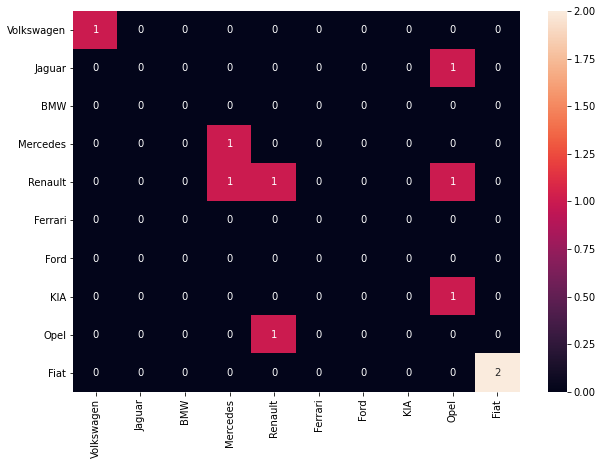

In [ ]:
import seaborn as sns
import pandas as pd
df_cm = pd.DataFrame(con_mat, index = [i for i in newClasses],
                  columns = [i for i in newClasses])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

###Fine-tuning

In [15]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(150, 150, 3))

In [16]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-5), # Taux d'apprentissage réduit pour ne pas tout casser, ni risquer le sur-apprentissage !
              metrics=['acc'])

In [18]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
84/84 [==============================] - 60s 262ms/step - loss: 1.9504 - acc: 0.3450 - val_loss: 1.0746 - val_acc: 0.6366
Epoch 2/20
84/84 [==============================] - 19s 221ms/step - loss: 0.6999 - acc: 0.7760 - val_loss: 0.8152 - val_acc: 0.7387
Epoch 3/20
84/84 [==============================] - 19s 231ms/step - loss: 0.3226 - acc: 0.9158 - val_loss: 0.7778 - val_acc: 0.7808
Epoch 4/20
84/84 [==============================] - 20s 234ms/step - loss: 0.1322 - acc: 0.9688 - val_loss: 0.8578 - val_acc: 0.7628
Epoch 5/20
84/84 [==============================] - 19s 228ms/step - loss: 0.0338 - acc: 0.9968 - val_loss: 1.0044 - val_acc: 0.7718
Epoch 6/20
84/84 [==============================] - 19s 227ms/step - loss: 0.0118 - acc: 0.9999 - val_loss: 0.9569 - val_acc: 0.7928
Epoch 7/20
84/84 [==============================] - 19s 231ms/step - loss: 0.0141 - acc: 0.9980 - val_loss: 1.0573 - val_acc: 0.7778
Epoch 8/20
84/84 [==============================] - 19s 231ms/step - 

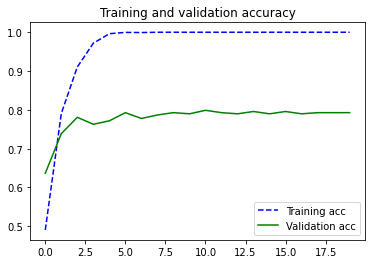

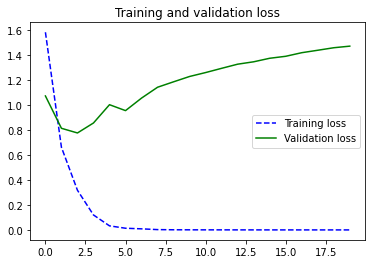

In [21]:
plot_training_analysis()

In [31]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=32)
print("[test loss, test acc] : ", results)

print("----------------------------------------------------")

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
samples = x_test
labels = y_test
predictions = model.predict(samples)
print("predictions shape:", predictions.shape)

Evaluate on test data
11/11 [==============================] - 1s 69ms/step - loss: 1.0983 - acc: 0.8348
[test loss, test acc] :  [1.0983330011367798, 0.8348348140716553]
----------------------------------------------------
Generate predictions for 10 samples
predictions shape: (333, 10)


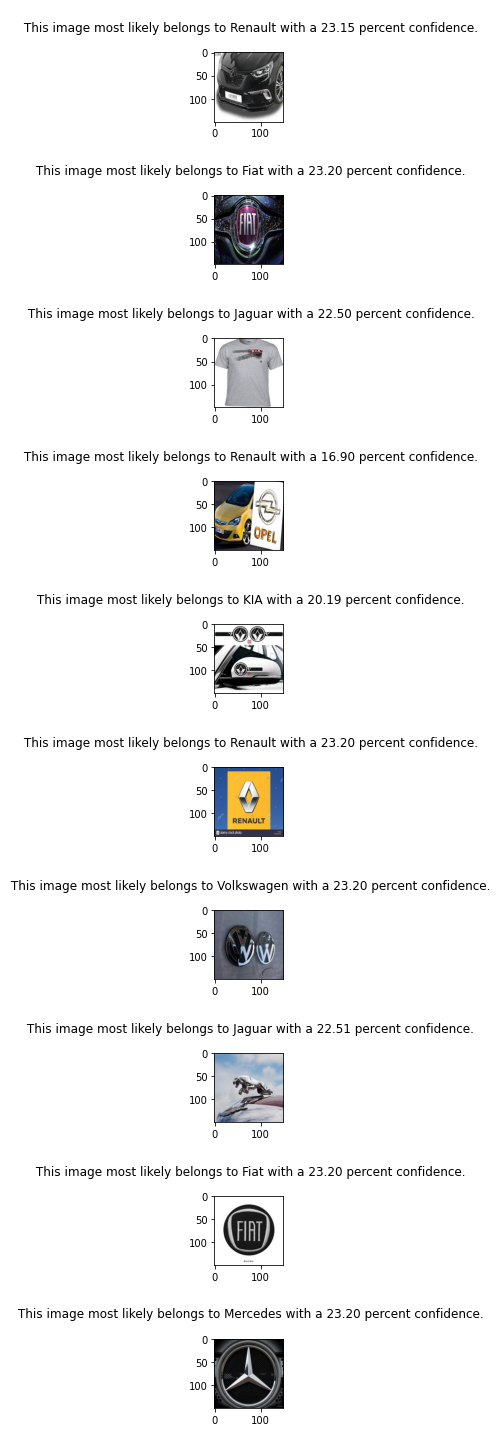

In [ ]:
class_id = [0,1] 
plt.figure(figsize=(20, 20))
for i in range(0, len(samples)):
  score = tf.nn.softmax(predictions[i])
  for j in range(0,1):
    plt.subplot(len(samples), 1, i+1)
    plt.title("\n This image most likely belongs to {} with a {:.2f} percent confidence.\n "
    .format(newClasses[np.argmax(score)], 100 * np.max(score)))
    plt.imshow(samples[i])
    break
         
plt.tight_layout()
plt.show()

In [32]:
argpred=np.argmax(predictions,axis=1)
label_arg = np.argmax(labels,axis=1)

In [ ]:
con_mat = tf.math.confusion_matrix(label_arg,argpred).numpy()
print(con_mat)

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2]]


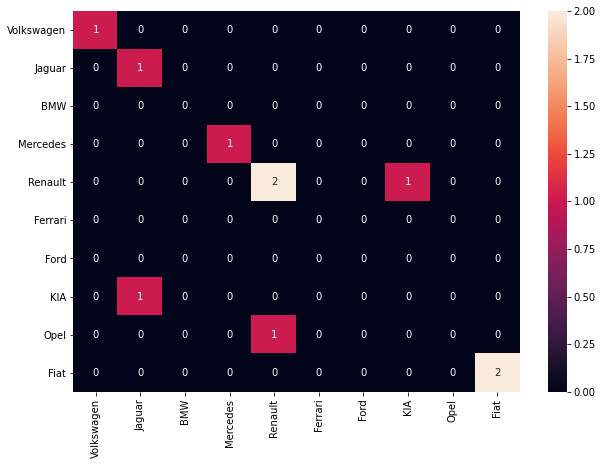

In [ ]:
import seaborn as sns
import pandas as pd
df_cm = pd.DataFrame(con_mat, index = [i for i in newClasses],
                  columns = [i for i in newClasses])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for all samples")
samples = x_test
labels = y_test
predictions = model.predict(samples)
print("predictions shape:", predictions.shape)

Generate predictions for all samples
predictions shape: (333, 10)


In [ ]:
argpred=np.argmax(predictions,axis=1)
label_arg = np.argmax(labels,axis=1)
con_mat = tf.math.confusion_matrix(label_arg,argpred).numpy()

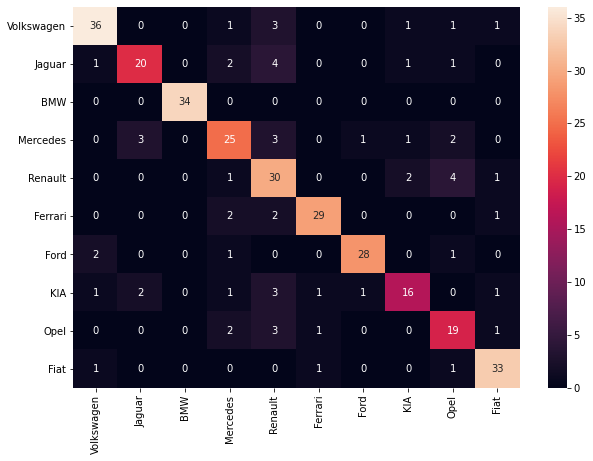

In [ ]:
df_cm = pd.DataFrame(con_mat, index = [i for i in newClasses],
                  columns = [i for i in newClasses])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [33]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(label_arg, argpred)))

print('Micro Precision: {:.2f}'.format(precision_score(label_arg, argpred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(label_arg, argpred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(label_arg, argpred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(label_arg, argpred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(label_arg, argpred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(label_arg, argpred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(label_arg, argpred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(label_arg, argpred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(label_arg, argpred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(label_arg, argpred, target_names=newClasses))


Accuracy: 0.83

Micro Precision: 0.83
Micro Recall: 0.83
Micro F1-score: 0.83

Macro Precision: 0.84
Macro Recall: 0.84
Macro F1-score: 0.84

Weighted Precision: 0.84
Weighted Recall: 0.83
Weighted F1-score: 0.84

Classification Report

              precision    recall  f1-score   support

        Fiat       0.86      0.86      0.86        28
     Ferrari       0.87      0.96      0.92        28
      Jaguar       0.81      0.84      0.82        25
         KIA       0.95      0.75      0.84        24
        Ford       0.83      0.91      0.87        33
    Mercedes       0.86      0.84      0.85        50
        Opel       0.63      0.79      0.70        24
         BMW       0.97      0.86      0.91        36
  Volkswagen       0.94      0.81      0.87        36
     Renault       0.73      0.76      0.74        49

    accuracy                           0.83       333
   macro avg       0.84      0.84      0.84       333
weighted avg       0.84      0.83      0.84       333

